### Домашнее задание
1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать feature engineering
3. обучить любой классификатор (какой вам нравится)
4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
5. применить random negative sampling для построения классификатора в новых условиях
6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

Эта база данных по раку молочной железы была получена из больниц Висконсинского университета в Мэдисоне от доктора Уильяма Х.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data')

In [5]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
df['Class'] = df['Class'].replace({2: 0, 4: 1})
df = df.drop(np.where(df['Bare Nuclei'] == '?')[0])
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
df.reset_index(drop=True)
df.drop('Sample code number', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 58.7 KB


In [9]:
df.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.00000,4.44217,2.82076,1.00000,2.00000,4.00000,6.00000,10.00000
Uniformity of Cell Size,683.00000,3.15081,3.06514,1.00000,1.00000,1.00000,5.00000,10.00000
Uniformity of Cell Shape,683.00000,3.21523,2.98858,1.00000,1.00000,1.00000,5.00000,10.00000
Marginal Adhesion,683.00000,2.83016,2.86456,1.00000,1.00000,1.00000,4.00000,10.00000
Single Epithelial Cell Size,683.00000,3.23426,2.22309,1.00000,2.00000,2.00000,4.00000,10.00000
Bare Nuclei,683.00000,3.54466,3.64386,1.00000,1.00000,1.00000,6.00000,10.00000
Bland Chromatin,683.00000,3.44510,2.44970,1.00000,2.00000,3.00000,5.00000,10.00000
Normal Nucleoli,683.00000,2.86969,3.05267,1.00000,1.00000,1.00000,4.00000,10.00000
Mitoses,683.00000,1.60322,1.73267,1.00000,1.00000,1.00000,1.00000,10.00000
Class,683.00000,0.34993,0.47730,0.00000,0.00000,0.00000,1.00000,1.00000


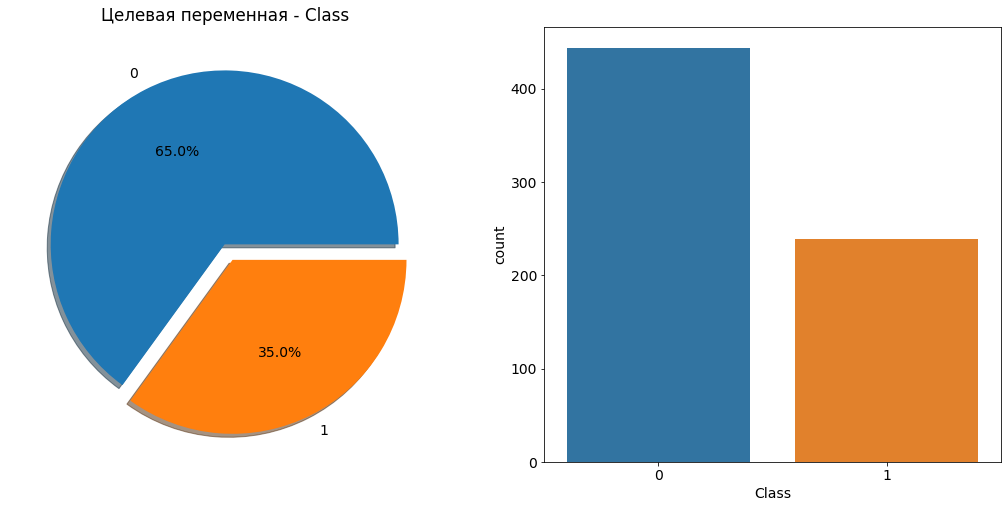

In [10]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
df['Class'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Целевая переменная - Class')
ax[0].set_ylabel('')
sns.countplot('Class', data=df, ax=ax[1])
plt.show()

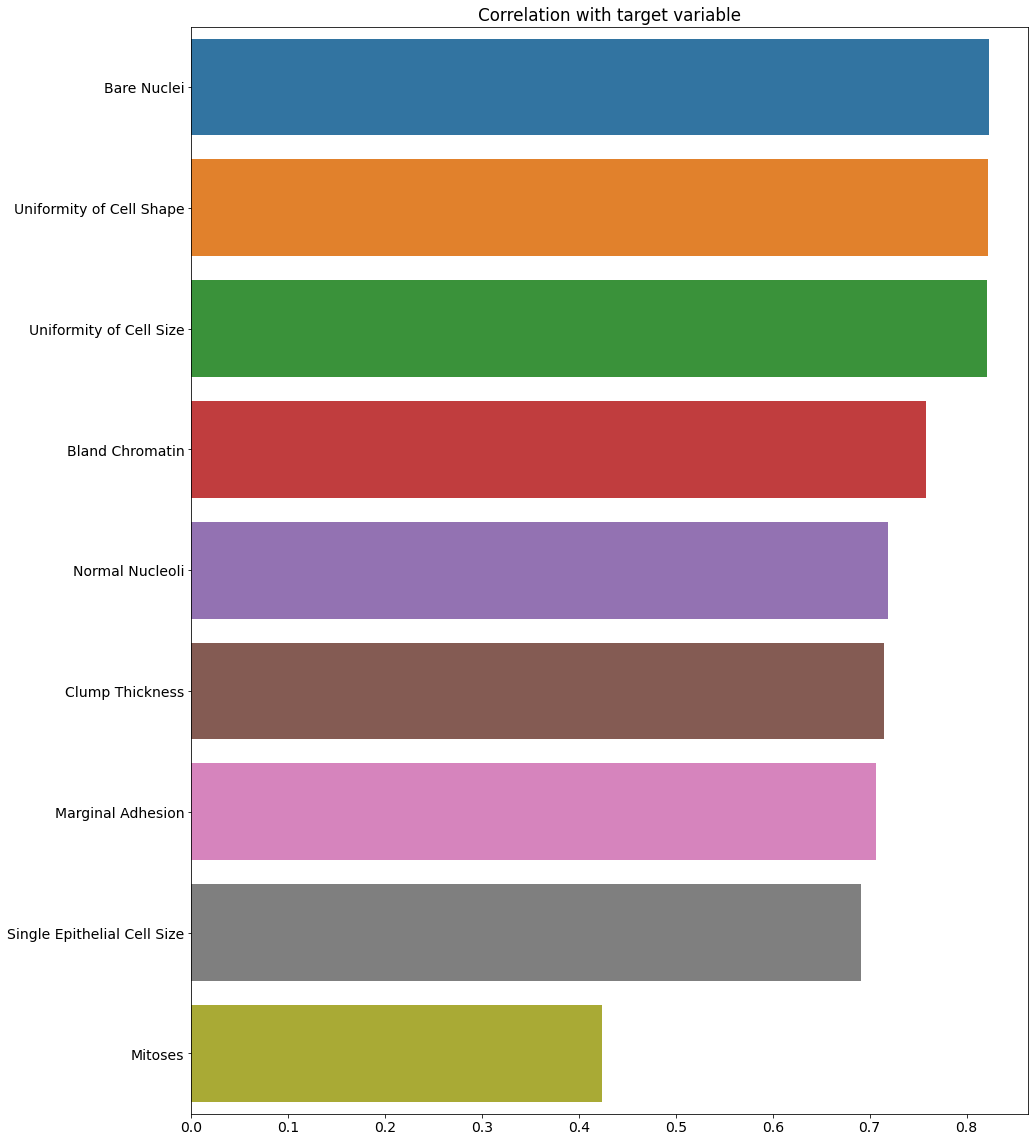

In [11]:
TARGET_NAME = 'Class'

corr_with_target = df.corr()[TARGET_NAME].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

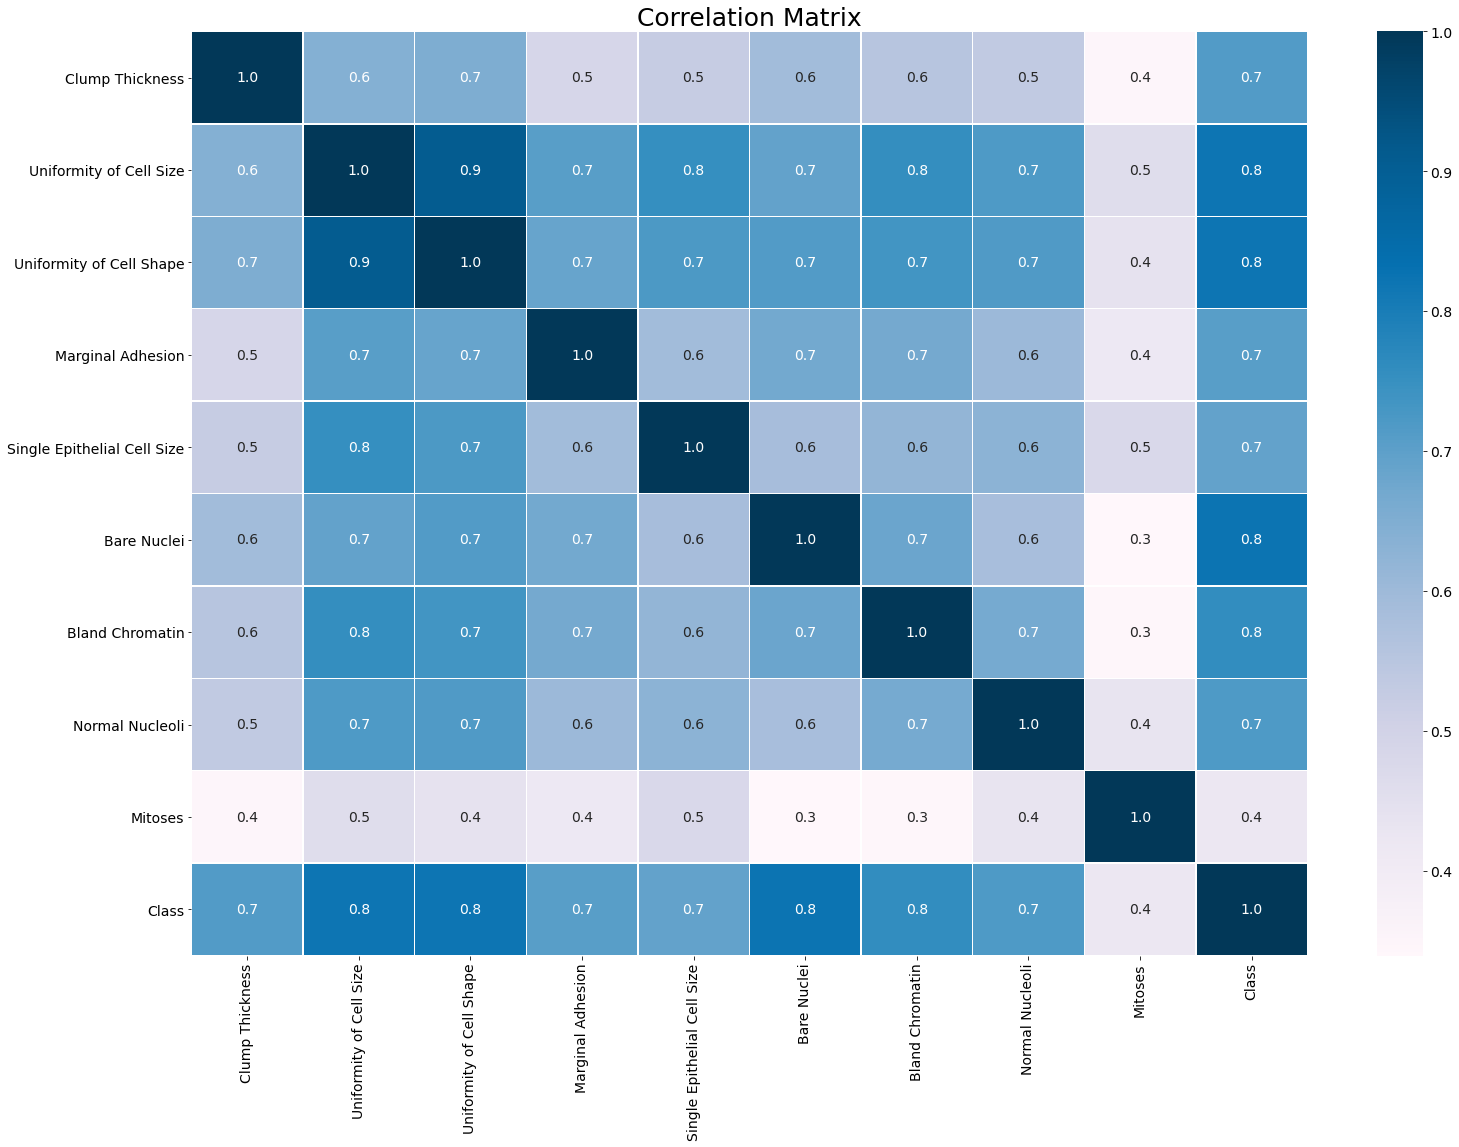

In [12]:
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(df.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [14]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(silent=True)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [15]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 96.00%
roc: 97.75%
recall: 100.00%
precision: 92.31%


In [16]:
mod_df = df.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_df.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 20% of the positives marked
pos_sample_len = int(np.ceil(0.2 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 60/239 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [17]:
mod_df['class_test'] = -1
mod_df.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_df.iloc[:,-1].value_counts())

target variable:
 -1    623
 1     60
Name: class_test, dtype: int64


We now have just 60 positive samples labeled as 1 in the 'class_test' col while the rest is unlabeled as -1.

Recall that col 'Class' still holds the actual label

In [18]:
mod_df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,class_test
0,5,1,1,1,2,1,3,1,1,0,-1
1,5,4,4,5,7,10,3,2,1,0,-1
2,3,1,1,1,2,2,3,1,1,0,-1
3,6,8,8,1,3,4,3,7,1,0,-1
4,4,1,1,3,2,1,3,1,1,0,-1
5,8,10,10,8,7,10,9,7,1,1,-1
6,1,1,1,1,2,10,3,1,1,0,-1
7,2,1,2,1,2,1,3,1,1,0,-1
8,2,1,1,1,2,1,1,1,5,0,-1
9,4,2,1,1,2,1,2,1,1,0,-1


In [19]:
x_data = mod_df.iloc[:,:-2].values # just the X 
y_labeled = mod_df.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_df.iloc[:,-2].values # original class

In [20]:
mod_df = mod_df.sample(frac=1)
neg_sample = mod_df[mod_df['class_test']==-1][:len(mod_df[mod_df['class_test']==1])]
sample_test = mod_df[mod_df['class_test']==-1][len(mod_df[mod_df['class_test']==1]):]
pos_sample = mod_df[mod_df['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(60, 11) (60, 11)


In [21]:
model = CatBoostClassifier(silent=True)

model.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
y_predict = model.predict(sample_test.iloc[:,:-2].values)
evaluate_results(sample_test.iloc[:,-2].values, y_predict)

Classification results:
f1: 96.04%
roc: 97.20%
recall: 96.81%
precision: 95.29%


### 2. probabilistic approach

In [22]:
def fit_PU_estimator(X,y, hold_out_ratio, estimator):
    
    # find the indices of the positive/labeled elements
    assert (type(y) == np.ndarray), "Must pass np.ndarray rather than list as y"
    positives = np.where(y == 1.)[0] 
    # hold_out_size = the *number* of positives/labeled samples 
    # that we will use later to estimate P(s=1|y=1)
    hold_out_size = int(np.ceil(len(positives) * hold_out_ratio))
    np.random.shuffle(positives)
    # hold_out = the *indices* of the positive elements 
    # that we will later use  to estimate P(s=1|y=1)
    hold_out = positives[:hold_out_size] 
    # the actual positive *elements* that we will keep aside
    X_hold_out = X[hold_out] 
    # remove the held out elements from X and y
    X = np.delete(X, hold_out,0) 
    y = np.delete(y, hold_out)
    # We fit the estimator on the unlabeled samples + (part of the) positive and labeled ones.
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X, y)
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)
    #take the probability that it is 1
    hold_out_predictions = hold_out_predictions[:,1]
    # save the mean probability 
    c = np.mean(hold_out_predictions)
    return estimator, c

def predict_PU_prob(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)
    predicted_s = predicted_s[:,1]
    return predicted_s / prob_s1y1

In [23]:
predicted = np.zeros(len(x_data))
learning_iterations = 24
for index in range(learning_iterations):
    pu_estimator, probs1y1 = fit_PU_estimator(x_data, y_labeled, 0.2, CatBoostClassifier(silent=True))
    predicted += predict_PU_prob(x_data, pu_estimator, probs1y1)
    if(index%4 == 0): 
        print(f'Learning Iteration::{index}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,2)}')

Learning Iteration::0/24 => P(s=1|y=1)=0.06
Learning Iteration::4/24 => P(s=1|y=1)=0.07
Learning Iteration::8/24 => P(s=1|y=1)=0.06
Learning Iteration::12/24 => P(s=1|y=1)=0.07
Learning Iteration::16/24 => P(s=1|y=1)=0.05
Learning Iteration::20/24 => P(s=1|y=1)=0.06


In [24]:
y_predict = [1 if x > 0.01 else 0 for x in (predicted/learning_iterations)]
evaluate_results(y_positive, y_predict)

Classification results:
f1: 51.84%
roc: 50.00%
recall: 100.00%
precision: 34.99%


Бонусный вопрос:

Как вы думаете, какой из методов на практике является более предпочтительным: random negative sampling или 2-step approach?

Ваш ответ здесь: в задаче классификации доброкачественных и злокачественных опухолей random negative sampling является более предпочтительным.

Вывод: на удивление модель, построенная на основе классификатора CatBoostClassifier, показала хорошие результаты без предварительной обработки данных и feature engineering.